
# 🧠 Demonstrating Underfitting in Neural Networks with TensorFlow

In this notebook, we will simulate **underfitting**, which occurs when a model is too simple to capture the underlying structure of the data.

---

## ✅ Key Characteristics of Underfitting
- Model is too simple (not enough capacity)
- Poor training and validation accuracy
- High loss values

---


In [1]:

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
import random

## 📥 Load and Preprocess MNIST Dataset

In [2]:

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# Split validation set
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

# Flatten images
x_train = x_train.reshape((-1, 28 * 28))
x_val = x_val.reshape((-1, 28 * 28))
x_test = x_test.reshape((-1, 28 * 28))


[0 1 2 3 4 5 6 7 8 9] [4932 5678 4968 5101 4859 4506 4951 5175 4842 4988]


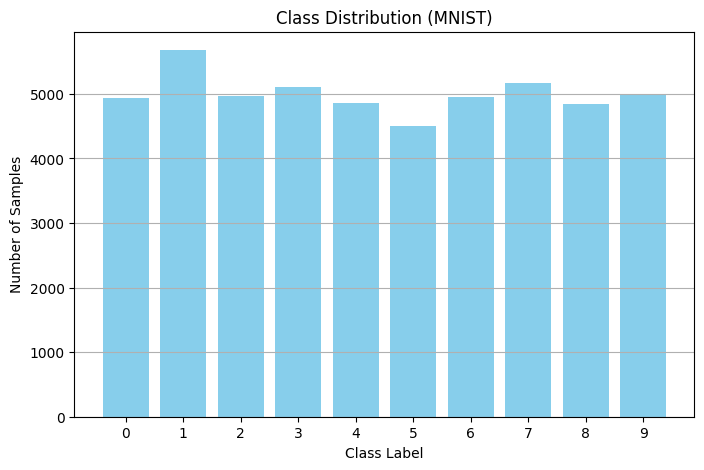

In [3]:
# Plot the bar chart
classes, counts = np.unique(y_train, return_counts=True)
print(classes, counts)
plt.figure(figsize=(8, 5))
plt.bar(classes, counts, tick_label=[str(c) for c in classes], color='skyblue')
plt.title("Class Distribution (MNIST)")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.grid(axis='y')
plt.show()

## 🧠 Define a Simple Model Architecture

In [4]:

def underfitting_model():
    model = models.Sequential()
    model.add(layers.Input(shape=(784,)))
    model.add(layers.Dense(1, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


## 🚂 Train the Model (Expect Underfitting)

In [5]:

model = underfitting_model()
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_val, y_val),
    verbose=2
)


Epoch 1/20
782/782 - 2s - 3ms/step - accuracy: 0.2076 - loss: 2.0097 - val_accuracy: 0.2165 - val_loss: 1.9095
Epoch 2/20
782/782 - 1s - 1ms/step - accuracy: 0.2254 - loss: 1.8821 - val_accuracy: 0.2267 - val_loss: 1.8413
Epoch 3/20
782/782 - 1s - 1ms/step - accuracy: 0.2628 - loss: 1.8109 - val_accuracy: 0.2776 - val_loss: 1.7490
Epoch 4/20
782/782 - 1s - 1ms/step - accuracy: 0.2866 - loss: 1.7282 - val_accuracy: 0.2922 - val_loss: 1.6885
Epoch 5/20
782/782 - 1s - 1ms/step - accuracy: 0.2910 - loss: 1.6874 - val_accuracy: 0.2887 - val_loss: 1.6597
Epoch 6/20
782/782 - 1s - 1ms/step - accuracy: 0.2929 - loss: 1.6649 - val_accuracy: 0.2930 - val_loss: 1.6412
Epoch 7/20
782/782 - 1s - 1ms/step - accuracy: 0.2949 - loss: 1.6505 - val_accuracy: 0.2953 - val_loss: 1.6285
Epoch 8/20
782/782 - 1s - 1ms/step - accuracy: 0.3008 - loss: 1.6399 - val_accuracy: 0.2969 - val_loss: 1.6182
Epoch 9/20
782/782 - 1s - 1ms/step - accuracy: 0.3092 - loss: 1.6318 - val_accuracy: 0.3311 - val_loss: 1.6101
E

## 📊 Plot Training vs Validation Performance

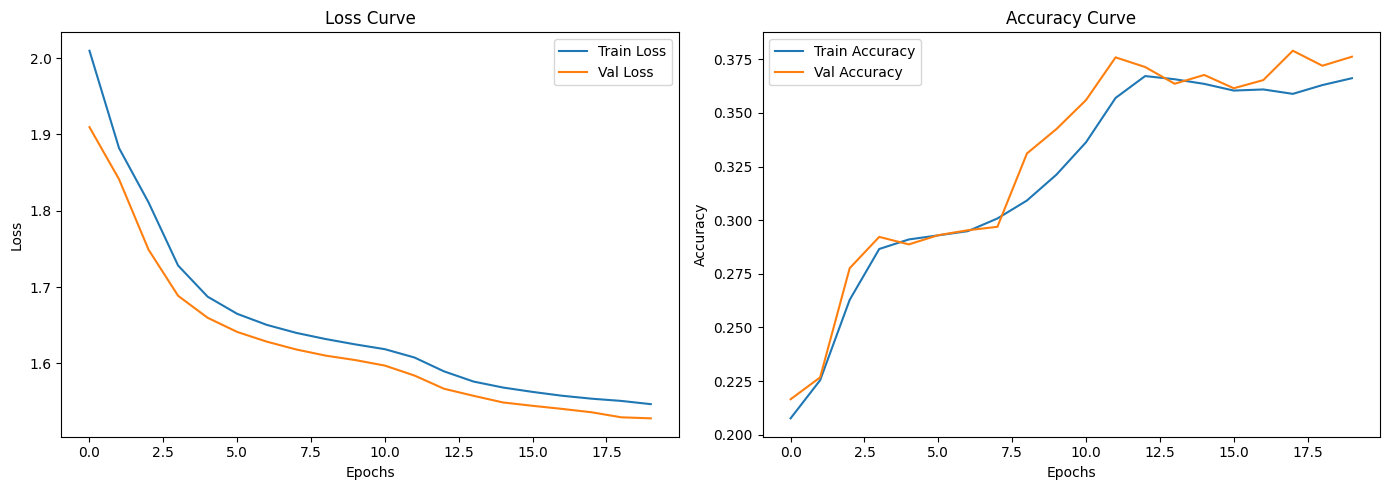

In [6]:

def plot_history(history):
    plt.figure(figsize=(14, 5))
    
    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)



---
## 🧠 Observations

- **Training and Validation Accuracy**: Remain low throughout
- **Loss**: Stays relatively high and doesn't decrease much
- This is a clear sign of **underfitting** — the model lacks the capacity to learn from the data.

---


In [7]:
# Evaluate
loss, acc = model.evaluate(x_test, y_test, verbose=1)
print(y_test[0:10])
# Show results
print(f"Accuracy: {acc:.4f}, Loss: {loss:.4f}")

# Predict on test set
y_pred = model.predict(x_test)

# Convert predictions to class labels
y_pred = np.argmax(y_pred, axis=1)
print(y_pred[0:10])


print("Accuracy Report:\n", classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3609 - loss: 1.5957
[7 2 1 0 4 1 4 9 5 9]
Accuracy: 0.3685, Loss: 1.5637
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step
[7 6 1 6 7 1 7 7 8 7]
Accuracy Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.52      0.92      0.67      1135
           2       0.26      0.34      0.29      1032
           3       0.29      0.40      0.34      1010
           4       0.36      0.09      0.15       982
           5       0.00      0.00      0.00       892
           6       0.37      0.75      0.50       958
           7       0.35      0.89      0.50      1028
           8       0.38      0.18      0.24       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.37     10000
   macro avg       0.25      0.36      0.27     10000
weighted avg       0.26      0.37      0.28     10000



d:\Visual Studio Code\AI_Classes_Aifalabs\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Visual Studio Code\AI_Classes_Aifalabs\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Visual Studio Code\AI_Classes_Aifalabs\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted label: 0.1


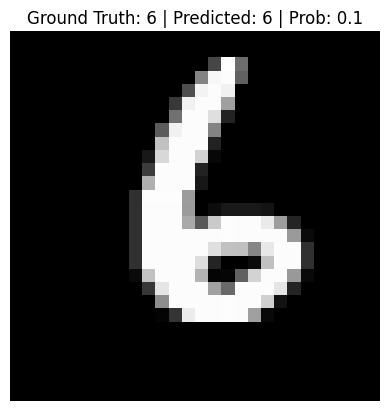

In [8]:

# Pick a random test sample
index = random.randint(0, x_test.shape[0] - 1)
sample_image = x_test[index].reshape(1, 784)  # Flatten for model input
ground_truth = y_test[index]

# Predict the label
logits = model.predict(sample_image)
# print(logits)
predicted_label = np.argmax(logits)

probabilities = str(tf.nn.softmax(logits).numpy()[0][predicted_label])[0:3]
# Print the probabilities
print(f"Predicted label: {probabilities}")
# Reshape back to 28x28 for visualization
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"Ground Truth: {ground_truth} | Predicted: {predicted_label} | Prob: {probabilities}")
plt.axis('off')
plt.show()